<h1> <center> Report for Assignment One </center> </h1>

> <center> 周海沧 15307130269 </center>

# Abstract

在这次作业中，我用 `numpy` 搭建了不同基函数对应的广义线性模型。同时，为了提高训练效率，我推导了向量化的公式并进行实现。我将展示不同基函数对应的广义线性模型对应的测试结果。从我的测试来看，加了正则化的二次多项式模型效果最好。

# Introduction

广义线性模型是对输入 $x$ 先做了一些非线性变换 $\phi_i(x)$ ，并将这些 $\phi_i(x)$ 进行线性组合得到的模型。其公式如下：
$$
y(\textbf{x}, \textbf{w}) = w_0 + \sum_j w_j \phi_j(\textbf{x})
\tag{1}
$$
其实，我认为这就是一个 `1.5` 层的神经网络，第一层是 $\phi_i(x)$ ，第二层（输出层）是没有 Activation 的线性组合，不同的基函数，其实就对应了第一层不同的 Activation 。在 Bishop 的这本书中，作者提到了指数基函数、高斯基函数、sigmoid基函数，我对此都进行了实现。同时，从测试数据来看，我认为应该用一个递增的多项式函数加上一个正弦函数（我称之为混合基函数），我也对这种方式进行了实现。从我的测试结果来看，sigmoid基函数对训练集拟合得非常好，但是泛化性能很差；而带有 L2 正则化的二次多项式在训练集和测试集上都拟合得不错。而对于我自己的混合基函数，由于超参数太难调整，我并没有取得预期的结果。

就模型的实现而言，我将模型分成 `forward-prop`, `compute cost`, `backprop` 和 `update` 四个过程。为了提高计算效率，当然需要使用向量化的计算公式。对此我进行了相关的公式推导。从训练消耗来看，几万次的迭代在 i5-7360U（双核四线处理器）上都是直接出结果，因此向量化的代码在 `numpy` 上运行效率极高。

# Methology

在这个部分，我将展现我的推导过程和代码框架。

### Formulation

在这里，我将展示多项式基函数的向量化公式的推导过程，对于高斯基函数和sigmoid基函数，我把它们对应的推导放在附录中（Appendix.A)。这里，我选择的损失函数是均方误差（MSE: Mean Square Error）

<table border="1">
	<tr>
		<td></td>
		<td>
            <center> non-vectorization </center>
		</td>
		<td>
            <center> vectorization </center>
		</td>
	</tr>

	<tr>
		<td>
			<left> forward-prop </left>
		</td>
		<td>
			$$
z = (x, x^1, ..., x^n)^T	\\
\hat{y} = b + w^Tz
$$
		</td>
		<td>
			$$
\hat{Y} = b + w^TZ
$$
		</td>
	</tr>

	<tr>
		<td>
			<left> compute cost </left>
		</td>
		<td>
			$$
loss = \frac{1}{2}(\hat{y} - y)^2
$$
		</td>
		<td>
			$$
cost = \frac{1}{2m}(\hat{Y} - Y)(\hat{Y} - Y)^T
$$
		</td>
	</tr>

	<tr>
		<td>
			<left> backprop </left>
		</td>
		<td>
			$$
\frac{\partial \, loss}{\partial \, \hat{y}} = \hat{y} - y	\\
\frac{\partial \, loss}{\partial \, w} = \frac{\partial \, loss}{\partial \, \hat{y}} \cdot z	\\
\frac{\partial \, loss}{\partial \, b} = \frac{\partial \, loss}{\partial \, \hat{y}} \cdot 1
$$
		</td>
		<td>
			$$
\frac{\partial \, cost}{\partial \, \hat{Y}} = \hat{Y} - Y	\\
\frac{\partial \, cost}{\partial \, w} = reduced\_mean(\frac{\partial \, cost}{\partial \, \hat{Y}} * Z, axis=1)	\\
\frac{\partial \, cost}{\partial \, b} = reduced\_mean(\frac{\partial \, cost}{\partial \, \hat{Y}})
$$
		</td>
	</tr>

	<tr>
		<td>
			<left> update </left>
		</td>
		<td>
			$$
w := (1 - \lambda)w - \alpha \frac{\partial \, loss}{\partial \, w}	\\
b := (1 - \lambda)b - \alpha \frac{\partial \, loss}{\partial \, b}
$$
		</td>
		<td>
			$$
w := (1 - \lambda)w - \alpha \frac{\partial \, cost}{\partial \, w}	\\
b := (1 - \lambda)b - \alpha \frac{\partial \, cost}{\partial \, b}
$$
		</td>
	</tr>

</table>

其中，$z$ 是列向量，$Z$ 是一个 $(n, m)$ 的矩阵，$Z$ 的每一列是 $z^{(i)}$，$*$ 表示矩阵之间对应元素相乘；在每次更新 $w$ 时，我使用了 $(1 - \lambda)w$，其中 $\lambda$ 是 L2 正则化的系数。

### Implementation

在 `base.py` 中，我的每个函数对应一个模型，函数首先对训练数据进行预处理，并对参数做初始化；循环按照上面表格的顺序进行迭代。

# Experiments

下面是对一些结果的展示

首先是多项式函数，一次会有些 underfitting，而二次以上开始 overfitting，对于二次做正则化后能够得到比较好的结果。
<table border="1">
    <tr>
        <td> <center> model </center> </td>
        <td> <center> hyperparameter </center> </td>
        <td> <center> std </center> </td>
    </tr>
    <tr>
        <td> power base, n = 1 </td>
        <td> learning rate = 5e-4 </td>
        <td> 20.7 </td>
    </tr>
    <tr>
        <td> power base, n = 2 </td>
        <td> learning rate = 1e-7, l2_lambda = 5e-4</td>
        <td> 9.4 </td>
    </tr>
    <tr>
        <td> power base, n = 3 </td>
        <td> learning rate = 1e-11, l2_lambda = 0.5 </td>
        <td> - </td>
    </tr>
</table>



(300,)
(200,)
预测值与真实值的标准差：20.7


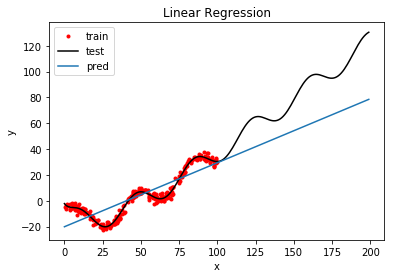

(300,)
(200,)
预测值与真实值的标准差：8.6


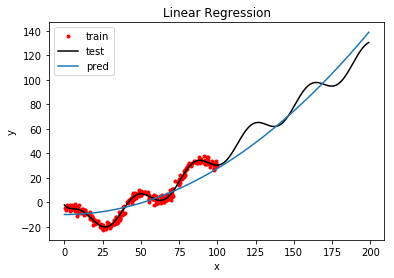

(300,)
(200,)
预测值与真实值的标准差：60.2


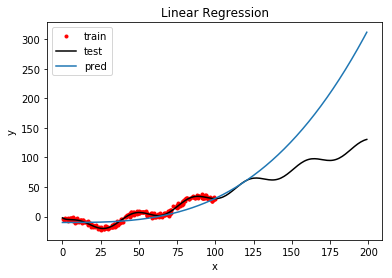

In [1]:
%matplotlib inline
from debug import test
test('power', lr=5e-4, n=1, epochs=50000, l2=0)
test('power', lr=1e-8, n=2, epochs=1000, l2=5e-2)
test('power', lr=1e-11, n=3, epochs=200000, l2=0.5)

之后是高斯基函数和sigmoid基函数，因为在这个测试集下，高斯基函数和sigmoid对于训练集区间之外的数据无法进行很好的拟合，因此我也没有再做很详细的参数调整。但从图中我们能够发现，这两个模型对于测试集对应的区间范围内的数据能够作出很好的拟合。

(300,)
(200,)
预测值与真实值的标准差：68.3


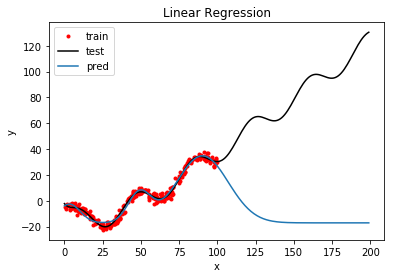

(300,)
(200,)


/Users/chrisea/prml/lab1/base.py:239: RuntimeWarning: overflow encountered in exp
  a = 1. / (1 + np.exp(-z))


预测值与真实值的标准差：38.7


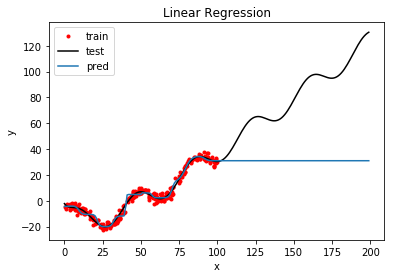

In [4]:
%matplotlib inline
from debug import test
test('gaussian', lr=1e-2, n=3, epochs=500000, l2=0)
test('sigmoid', lr=1e-2, n=10, epochs=90000, l2=0)

最后是我自己的混合基函数，这个模型的表现不稳定，需要很强的调参技巧，这里我把经过参数调整之后的模型的结果也展示如下：

(300,)
(200,)
预测值与真实值的标准差：5.0


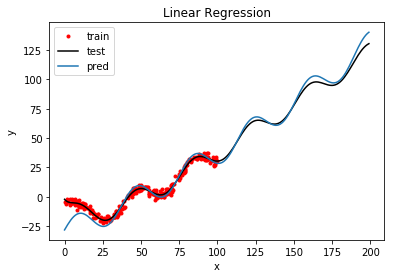

In [3]:
%matplotlib inline
from debug import test
test('mix', lr=1e-5, epochs=200000, l2=0)

# Conclusion

从结果来看，指数基函数的表现很好，而高斯基函数和sigmoid基函数能很好地拟合训练集，至于最后的混合基函数，可以理解为人为的先验对模型的改善。

# Appendix

### Appendix.A

高斯基函数

<table>
	<tr>
		<td></td>
		<td>
            <center> non-vectorization </center>
		</td>
		<td>
            <center> vectorization </center>
		</td>
	</tr>

	<tr>
		<td>
			forward-prop
		</td>
		<td>
			$$
z = \frac{x - \mu}{s}	\\
a = \exp({-\frac{z^2}{2}})	\\
\hat{y} = w^Ta + b
$$
		</td>
		<td>
			$$
Z = \frac{X - \mu}{s}	\\
A = \exp({-\frac{Z * Z}{2}})	\\
\hat{Y} = w^TA + b
$$
		</td>
	</tr>

	<tr>
		<td>
			compute cost
		</td>
		<td>
			l$$
loss = \frac{1}{2}(\hat{y} - y)^2
$$
		</td>
		<td>
			$$
cost = \frac{1}{2m}(\hat{Y} - Y)^2
$$
		</td>
	</tr>

	<tr>
		<td>
			backprop
		</td>
		<td>
			$$
\frac{\partial \, loss}{\partial \, \hat{y}} = \hat{y} - y	\\
\frac{\partial \, loss}{\partial \, w} = \frac{\partial \, loss}{\partial \, \hat{y}} \cdot a	\\
\frac{\partial \, loss}{\partial \, b} = \frac{\partial \, loss}{\partial \, \hat{y}} \cdot 1	\\
\frac{\partial \, loss}{\partial \, a} = \frac{\partial \, loss}{\partial \, \hat{y}} \cdot w	\\
\frac{\partial \, loss}{\partial \, z} = \frac{\partial \, loss}{\partial \, a} * \exp({-\frac{z * z}{2}}) * (-z)	\\
\frac{\partial \, loss}{\partial \, \mu} = \frac{\partial \, loss}{\partial \, z} * (-\frac{1}{s})	\\
\frac{\partial \, loss}{\partial \, s} = \frac{\partial \, loss}{\partial \, z} * (-\frac{x - \mu}{s * s})
$$		</td>
		<td>
			$$
\frac{\partial \, cost}{\partial \, \hat{Y}} = \hat{Y} - Y	\\
\frac{\partial \, cost}{\partial \, w} = \frac{1}{m} (A \cdot (\frac{\partial \, cost}{\partial \, \hat{Y}})^T)	\\
\frac{\partial \, cost}{\partial \, b} = reduced\_mean(\frac{\partial \, cost}{\partial \, \hat{Y}})	\\
\frac{\partial \, cost}{\partial \, A} = W * \frac{\partial \, cost}{\partial \, \hat{Y}}	\\
\frac{\partial \, cost}{\partial \, Z} = \frac{\partial \, cost}{\partial \, A} * A * (-Z)	\\
\frac{\partial \, cost}{\partial \, \mu} = reduced\_mean(\frac{\partial \, cost}{\partial \, Z} * (-\frac{1}{s}), axis=1)	\\
\frac{\partial \, cost}{\partial \, s} = reduced\_mean(\frac{\partial \, cost}{\partial \, Z} * (-\frac{X - \mu}{s * s}), axis=1)
$$
		</td>
	</tr>

	<tr>
		<td>
			update
		</td>
		<td>
			<center> update w, b, $\mu$, s </center>
		</td>
		<td>
			<center> update w, b, $\mu$, s </center>
		</td>
	</tr>
</table>

sigmoid 基函数

<table>
	<tr>
		<td></td>
		<td>
            <center> non-vectorization </center>
		</td>
		<td>
            <center> vectorization </center>
		</td>
	</tr>

	<tr>
		<td>
			forward-prop
		</td>
		<td>
			$$
z = \frac{x - \mu}{s}	\\
a = \sigma(z)	\\
\hat{y} = b + w^Ta
$$
		</td>
		<td>
			$$
Z = \frac{X - \mu}{s}	\\
A = \sigma(Z)	\\
\hat{Y} = b + w^TA
$$
		</td>
	</tr>

	<tr>
		<td>
			compute cost
		</td>
		<td>
			$$
loss = \frac{1}{2} (\hat{y} - y)^2
$$
		</td>
		<td>
			$$
cost = \frac{1}{2m} (\hat{Y} - Y)^2
$$
		</td>
	</tr>

	<tr>
		<td>
			backprop
		</td>
		<td>
			$$
\frac{\partial \, loss}{\partial \, \hat{y}} = \hat{y} - y	\\
\frac{\partial \, loss}{\partial \, a} = \frac{\partial \, loss}{\partial \, \hat{y}} \cdot w	\\
\frac{\partial \, loss}{\partial \, w} = \frac{\partial \, loss}{\partial \, \hat{y}} \cdot a	\\
\frac{\partial \, loss}{\partial \, b} = \frac{\partial \, loss}{\partial \, \hat{y}}	\\
\frac{\partial \, loss}{\partial \, z} = \frac{\partial \, loss}{\partial \, a} \cdot a(1 - a)	\\
\frac{\partial \, loss}{\partial \, \mu} = \frac{\partial \, loss}{\partial \, z} \cdot (- \frac{1}{s})	\\
\frac{\partial \, loss}{\partial \, s} = \frac{\partial \, loss}{\partial \, z} \cdot (-\frac{x - \mu}{s^2})
$$
		</td>
		<td>
			$$
\frac{\partial \, cost}{\partial \, \hat{Y}} = \hat{Y} - Y	\\
\frac{\partial \, cost}{\partial \, A} = \frac{\partial \, cost}{\partial \, \hat{Y}} * W	\\
\frac{\partial \, cost}{\partial \, w} = \frac{1}{m} A \cdot (\frac{\partial \, cost}{\partial \, \hat{Y}})^T	\\
\frac{\partial \, cost}{\partial \, b} = reduced\_mean(\frac{\partial \, cost}{\partial \, \hat{Y}})	\\
\frac{\partial \, cost}{\partial \, Z} = \frac{\partial \, cost}{\partial \, A} * A * (1 - A)	\\
\frac{\partial \, cost}{\partial \, \mu} = reduced\_mean(\frac{\partial \, cost}{\partial \, Z} * (- \frac{1}{s}), axis=1)	\\
\frac{\partial \, cost}{\partial \, s} = reduced\_mean(\frac{\partial \, cost}{\partial \, Z} * (-\frac{X - \mu}{s^2}), axis=1)
$$
		</td>
	</tr>

	<tr>
		<td>
			update
		</td>
		<td>
			<center> update w, b </center>
		</td>
		<td>
			<center> update w, b </center>
		</td>
	</tr>
</table>